# Sentiment analysis on Reviews given by viewers on IMDB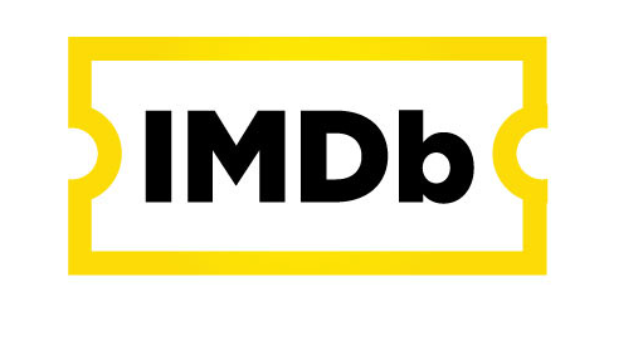


The Dataset and The Problem to Solve

In this notebbok, we’ll use an IMDB dataset of 50k movie reviews available on Kaggle. The dataset contains 2 columns (review and sentiment) that will help us identify whether a review is positive or negative.

Problem formulation: Our goal is to find which machine learning model is best suited to predict sentiment (output) given a movie review (input)

1. Importing necessary libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import nltk
import string
from nltk.corpus import stopwords

2. Preparing the data

In [3]:
from google.colab import files
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset (2).csv


In [4]:
df_review = pd.read_csv("IMDB Dataset.csv")
df_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
positive_reviews = (df_review["sentiment"]=="positive").sum()
negative_reviews = (df_review["sentiment"]=="negative").sum()
print("positive_reviews: " + str(positive_reviews))
print("negative_reviews: " + str(negative_reviews))

positive_reviews: 25000
negative_reviews: 25000


This dataset contains 50000 rows; however, to train our model faster in the following steps, we’re going to take a smaller sample of 10000 rows. This small sample will contain 5000 positive and 5000 negative reviews to make the data imbalanced (so I can teach you undersampling and oversampling techniques in the next step)

In [6]:

df_positive = df_review[df_review['sentiment']=='positive'][:5000]
df_negative = df_review[df_review['sentiment']=='negative'][:5000]

df_review_imb = pd.concat([df_positive,df_negative ])
df_review_imb.shape[0]


10000

In [7]:
df =df_review.copy()
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Removing all the HTML texts in the reviews

In [9]:
def remove_HTML(text):
    return BeautifulSoup(text,"html.parser").get_text()

In [10]:
df["review"]=df["review"].apply(remove_HTML)

In [11]:
df["review"]

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


The text_processing function is a custom text preprocessing pipeline designed for natural language processing tasks. It starts by removing all punctuation from the input text using a list comprehension. Then, it converts the text to lowercase and splits it into individual words. Next, it filters out common English stopwords (like "the", "is", "and") using NLTK's stopword list. Finally, it lemmatizes the remaining words using WordNetLemmatizer, reducing each word to its base or dictionary form (e.g., "running" becomes "run"). The function returns a list of clean, meaningful tokens that are more suitable for text analysis or machine learning tasks like sentiment classification

In [12]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def text_processing(text):
    # 1. Remove punctuation
    no_pun = ''.join([char for char in text if char not in string.punctuation])

    # 2. Lowercase and split into words
    words = no_pun.lower().split()

    # 3. Remove stopwords and lemmatize
    clean_words = [
        lemmatizer.lemmatize(word)
        for word in words
        if word not in stop_words
    ]

    return clean_words  # return list of tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df["review"]=df["review"].apply(text_processing)

In [14]:
df["review"].head()

,review
0,"[one, reviewer, mentioned, watching, 1, oz, ep..."
1,"[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, there, family, little, boy, jake, ..."
4,"[petter, matteis, love, time, money, visually,..."


In [15]:
X = df["review"]
y = df["sentiment"].map({"positive":1,"negative":0})


Splitting data into train and test set

In [16]:
from sklearn.model_selection import train_test_split

In [37]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

 3.TF-IDF Vectorization (Term Frequency–Inverse Document Frequency).

The given code uses TfidfVectorizer from scikit-learn to convert raw text data into numerical feature vectors based on Term Frequency–Inverse Document Frequency (TF-IDF), which reflects the importance of words in a document relative to the entire corpus. First, tfidf.fit_transform(X_train) learns the vocabulary from the training data and transforms the text into a sparse matrix of TF-IDF features. Then, tfidf.transform(X_test) uses the same learned vocabulary to transform the test data, ensuring consistency between training and testing representations. This process prepares the textual data for input into machine learning models.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
X_train = X_train.apply(lambda x: ' '.join(x))
X_test = X_test.apply(lambda x: ' '.join(x))


tfidf = TfidfVectorizer()
X_train_vector = tfidf.fit_transform(X_train)
X_test_vector = tfidf.transform(X_test)

In [20]:

pd.DataFrame.sparse.from_spmatrix(X_train_vector,
                                  index=X_train.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,00000001,000001,001,002,00383042,007,0079,007the,0080,0083,009,00s,00schneider,01,010,01000,0101,010606,010707,010guinea,010ps,0110,0126,013007,02,029,02i,03,039,03oct2009,04,048,05,050,0510,053105,05ps,06,...,äänekoski,åge,åmål,æon,æsthetic,écoffey,écran,édith,élan,éloge,émigré,émigrés,époque,était,évery,êtrepeutêtre,ís,ísnt,ïn,óli,önsjön,örnek,østbye,úbercrap,über,überannoying,überbabe,übermensch,übermenschlich,übervamp,überwoman,ünel,üvegtigris,üzümcü,ýs,þorleifsson,þór,četvorka,יגאל,כרמון
23990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train_vector.size

3251234

4.Model Selection

In our example, our input (review) and output (sentiment) are clearly identified, so we can say we have labeled input and output data; therefore, we’re dealing with supervised learning.

We will benchmark the four classification models.


Support Vector Machine(SVM)

In [22]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_vector, y_train)


LinearSVC()

In [23]:

print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

[1]
[1]
[0]



Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train_vector,y_train)

DecisionTreeClassifier()

Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_vector, y_train)


MultinomialNB()

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_vector, y_train)

LogisticRegression()

5. Model Evaluation


Mean Accuracy

In [27]:

print(svc.score(X_test_vector,y_test))
print(d_tree.score(X_test_vector,y_test))
print(nb.score(X_test_vector,y_test))
print(log_reg.score(X_test_vector,y_test))

0.8954545454545455
0.716
0.864909090909091
0.8940606060606061


SVM and Logistic Regression perform better than the other two classifiers, with SVM having a slight advantage (89.5% of accuracy).Thus,we’ll focus only on SVM.

In [28]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix

F1 Score

In [29]:
f1_score(y_test,svc.predict(X_test_vector),labels=[0,1],average=None)

array([0.89400922, 0.89686099])

Classification report

In [30]:
cr = classification_report(y_test,svc.predict(X_test_vector))
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      8208
           1       0.89      0.90      0.90      8292

    accuracy                           0.90     16500
   macro avg       0.90      0.90      0.90     16500
weighted avg       0.90      0.90      0.90     16500




Confusion Matrix

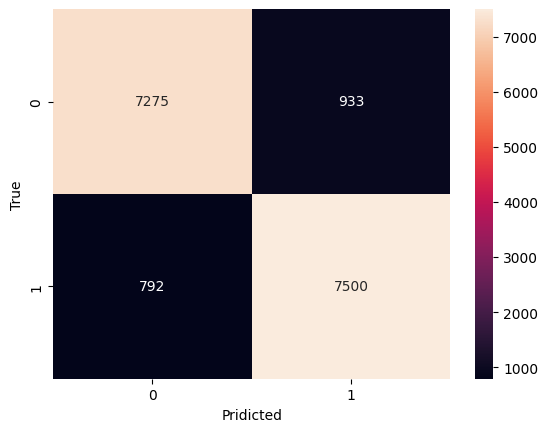

In [31]:
cm = confusion_matrix(y_test,svc.predict(X_test_vector),labels=[0,1])
sns.heatmap(data = cm,annot = True,fmt="d")
plt.xlabel("Pridicted")
plt.ylabel("True")
plt.show()


6. Tuning the Model


GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC


params = {

    'C': [0.1, 1, 10],

}

svc = LinearSVC()
grid = GridSearchCV(svc, params, cv=5)
grid.fit(X_train_vector, y_train)



GridSearchCV(cv=5, estimator=LinearSVC(), param_grid={'C': [0.1, 1, 10]})

In text classification tasks (e.g., using TF-IDF), the data usually lies in a high-dimensional sparse space, where a linear hyperplane can effectively separate classes.


Non-linear kernels (like rbf, poly, or sigmoid) are computationally expensive and slower to train, especially on large text datasets

In [33]:

print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1}
LinearSVC(C=1)


In [34]:
svc = LinearSVC(C=1)
svc.fit(X_train_vector, y_train)

LinearSVC(C=1)

In [35]:
print(svc.score(X_test_vector,y_test))

0.8954545454545455


So Above obtained paramters and kernel are the best for our model to obtain desired results as accurate as possible